## Data Preparation

In [12]:
import pandas as pd

In [151]:
df = pd.read_csv("telco.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [153]:
df.shape

(7043, 21)

## Data Preprocessing

In [154]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #menghapus spasi dan mengganti dtype

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [156]:
## one hot encoding

In [157]:
df_obj = df.select_dtypes(["object"])
col_obj = list(df_obj.columns)
col_obj

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [158]:
col_obj.remove('customerID')
col_obj.remove('Churn')

In [159]:
df_clean = pd.get_dummies(df, columns = col_obj)
df_clean

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,5575-GNVDE,0,34,56.95,1889.50,No,False,True,True,False,...,False,False,True,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,53.85,108.15,Yes,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
3,7795-CFOCW,0,45,42.30,1840.75,No,False,True,True,False,...,False,False,True,False,True,False,True,False,False,False
4,9237-HQITU,0,2,70.70,151.65,Yes,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,No,False,True,False,True,...,True,False,True,False,False,True,False,False,False,True
7039,2234-XADUH,0,72,103.20,7362.90,No,True,False,False,True,...,True,False,True,False,False,True,False,True,False,False
7040,4801-JZAZL,0,11,29.60,346.45,No,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
7041,8361-LTMKD,1,4,74.40,306.60,Yes,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True


In [160]:
# Tambahkan sel ini setelah sel pd.to_numeric
# Cek dulu berapa banyak baris NaN
print(f"Jumlah baris sebelum di-drop: {len(df_clean)}")
print(f"Jumlah baris dengan NaN: {df_clean.isnull().any(axis=1).sum()}")

# Hapus semua baris yang mengandung setidaknya satu nilai NaN
df_clean.dropna(inplace=True)

# Cek hasilnya
print(f"Jumlah baris setelah di-drop: {len(df)}")
df_clean.info()

Jumlah baris sebelum di-drop: 7043
Jumlah baris dengan NaN: 11
Jumlah baris setelah di-drop: 7043
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   SeniorCitizen                            7032 non-null   int64  
 2   tenure                                   7032 non-null   int64  
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   Churn                                    7032 non-null   object 
 6   gender_Female                            7032 non-null   bool   
 7   gender_Male                              7032 non-null   bool   
 8   Partner_No                               7032 non-null   bool   
 9   Partner_Yes              

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
y = df_clean['Churn'].map({'No': 0, "Yes": 1}) #menjadi binner
x = df_clean.drop(columns = ["Churn"])

In [163]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.3, random_state = 1)

In [164]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4922, 46)
(2110, 46)
(4922,)
(2110,)


In [165]:
## Imbalance

In [166]:
y_train.value_counts()

Churn
0    3608
1    1314
Name: count, dtype: int64

In [167]:
from sklearn.utils import resample

df_train = pd.concat([x_train, y_train], axis = 1)

df_majority = df_train[df_train['Churn'] == 0]
df_minority = df_train[df_train['Churn'] == 1]

df_minority_up = resample(df_minority, replace = True, n_samples = 3608, random_state = 1)

df_train_up = pd.concat([df_majority, df_minority_up])

In [168]:
df_train_up['Churn'].value_counts()

Churn
0    3608
1    3608
Name: count, dtype: int64

In [169]:
# Pisahkan fitur (X) dan target (y) dari data upsampled
y_train_up = df_train_up['Churn']
x_train_up = df_train_up.drop(columns = ["Churn"])

## Modeling Logistic Regression

In [170]:
## Remove Unless Feature
x_train = x_train.drop(columns = ["customerID"])
x_train_up = x_train_up.drop(columns = ["customerID"])

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

log_reg_up = LogisticRegression()
log_reg_up.fit(x_train_up, y_train_up)

C:\Users\zmdin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\zmdin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression()

## Modeling Decision Tree

In [173]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

dt_up = DecisionTreeClassifier()
dt_up.fit(x_train_up, y_train_up)

DecisionTreeClassifier()

## Modeling Random Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

rf_up = RandomForestClassifier()
rf_up.fit(x_train_up, y_train_up)

RandomForestClassifier()

## HyperParameter

In [175]:
params = {
    "max_depth": [2,3,5,10,15],
    "min_samples_leaf": [15,30,50,100,150]
}

In [176]:
rf_base = RandomForestClassifier()

In [177]:
from sklearn.model_selection import GridSearchCV

In [178]:
grid_search = GridSearchCV(estimator = rf_base,
                           param_grid = params,
                           cv = 10,
                           scoring = "roc_auc")

In [179]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10, 15],
                         'min_samples_leaf': [15, 30, 50, 100, 150]},
             scoring='roc_auc')

In [180]:
rf_best = grid_search.best_estimator_
rf_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=15)

In [181]:
grid_search_up = GridSearchCV(estimator = rf_base,
                           param_grid = params,
                           cv = 5,
                           scoring = "roc_auc")
grid_search_up.fit(x_train_up, y_train_up)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10, 15],
                         'min_samples_leaf': [15, 30, 50, 100, 150]},
             scoring='roc_auc')

In [182]:
rf_best_up = grid_search.best_estimator_
rf_best_up.fit(x_train_up, y_train_up)

RandomForestClassifier(max_depth=15, min_samples_leaf=15)

Evaluate Modeling

In [183]:
log_reg

LogisticRegression()

In [184]:
log_reg_up

LogisticRegression()

In [185]:
dt

DecisionTreeClassifier()

In [186]:
dt_up

DecisionTreeClassifier()

In [187]:
rf

RandomForestClassifier()

In [188]:
rf_up

RandomForestClassifier()

In [189]:
rf_best

RandomForestClassifier(max_depth=15, min_samples_leaf=15)

In [190]:
rf_best_up

RandomForestClassifier(max_depth=15, min_samples_leaf=15)

In [192]:
x_test = x_test.drop(columns = ['customerID'])

In [194]:
## Prediction x-test

y_lr = log_reg.predict(x_test)
y_lr_up = log_reg_up.predict(x_test)

y_dt = dt.predict(x_test)
y_dt_up = dt_up.predict(x_test)

y_rf = rf.predict(x_test)
y_rf_up = rf_up.predict(x_test)

y_rf_best = rf_best.predict(x_test)
y_rf_best_up = rf_best_up.predict(x_test)

In [195]:
## Precision

In [198]:
from sklearn.metrics import precision_score

pr_lr = precision_score(y_test, y_lr, pos_label = 1, average = "binary")
pr_lr_up = precision_score(y_test, y_lr_up, pos_label = 1, average = "binary")

pr_dt = precision_score(y_test, y_dt, pos_label = 1, average = "binary")
pr_dt_up = precision_score(y_test, y_dt_up, pos_label = 1, average = "binary")

pr_rf = precision_score(y_test, y_rf, pos_label = 1, average = "binary")
pr_rf_up = precision_score(y_test, y_rf_up, pos_label = 1, average = "binary")

pr_rf_best = precision_score(y_test, y_rf_best, pos_label = 1, average = "binary")
pr_rf_best_up = precision_score(y_test, y_rf_best_up, pos_label = 1, average = "binary")

In [199]:
print("===== Precision logistic Regression =====")
print(pr_lr)
print(pr_lr_up)
print("===== Precision Decision Tree =====")
print(pr_dt)
print(pr_dt_up)
print("===== Precision Random Forest =====")
print(pr_rf)
print(pr_rf_up)
print(pr_rf_best)
print(pr_rf_best_up)

===== Precision logistic Regression =====
0.642706131078224
0.5148401826484018
===== Precision Decision Tree =====
0.4768211920529801
0.49635036496350365
===== Precision Random Forest =====
0.6152019002375297
0.5665399239543726
0.5245700245700246
0.5245700245700246


In [ ]:
## Recall

In [200]:
from sklearn.metrics import recall_score

recall_lr = recall_score(y_test, y_lr, pos_label = 1, average = "binary")
recall_lr_up = recall_score(y_test, y_lr_up, pos_label = 1, average = "binary")

recall_dt = recall_score(y_test, y_dt, pos_label = 1, average = "binary")
recall_dt_up = recall_score(y_test, y_dt_up, pos_label = 1, average = "binary")

recall_rf = recall_score(y_test, y_rf, pos_label = 1, average = "binary")
recall_rf_up = recall_score(y_test, y_rf_up, pos_label = 1, average = "binary")

recall_rf_best = recall_score(y_test, y_rf_best, pos_label = 1, average = "binary")
recall_rf_best_up = recall_score(y_test, y_rf_best_up, pos_label = 1, average = "binary")

In [202]:
print("===== Recall logistic Regression =====")
print(recall_lr)
print(recall_lr_up)
print("===== Recall Decision Tree =====")
print(recall_dt)
print(recall_dt_up)
print("===== Recall Random Forest =====")
print(recall_rf)
print(recall_rf_up)
print(recall_rf_best)
print(recall_rf_best_up)

===== Recall logistic Regression =====
0.5477477477477477
0.8126126126126126
===== Recall Decision Tree =====
0.518918918918919
0.4900900900900901
===== Recall Random Forest =====
0.4666666666666667
0.5369369369369369
0.7693693693693694
0.7693693693693694


In [203]:
## AUC
## Prediction x-test

y_lr = log_reg.predict_proba(x_test)[:, 1]
y_lr_up = log_reg_up.predict_proba(x_test)[:, 1]

y_dt = dt.predict_proba(x_test)[:, 1]
y_dt_up = dt_up.predict_proba(x_test)[:, 1]

y_rf = rf.predict_proba(x_test)[:, 1]
y_rf_up = rf_up.predict_proba(x_test)[:, 1]

y_rf_best = rf_best.predict_proba(x_test)[:, 1]
y_rf_best_up = rf_best_up.predict_proba(x_test)[:, 1]

In [205]:
from sklearn.metrics import roc_auc_score

auc_lr = roc_auc_score(y_test, y_lr)
auc_lr_up = roc_auc_score(y_test, y_lr_up)

auc_dt = roc_auc_score(y_test, y_dt)
auc_dt_up = roc_auc_score(y_test, y_dt_up)

auc_rf = roc_auc_score(y_test, y_rf)
auc_rf_up = roc_auc_score(y_test, y_rf_up)

auc_rf_best = roc_auc_score(y_test, y_rf_best)
auc_rf_best_up = roc_auc_score(y_test, y_rf_best_up)

In [206]:
print("===== AUC logistic Regression =====")
print(auc_lr)
print(auc_lr_up)
print("===== AUC Decision Tree =====")
print(auc_dt)
print(auc_dt_up)
print("===== AUC Random Forest =====")
print(auc_rf)
print(auc_rf_up)
print(auc_rf_best)
print(auc_rf_best_up)

===== AUC logistic Regression =====
0.8434170504910055
0.8430960864401379
===== AUC Decision Tree =====
0.6572329886156253
0.6566078618811737
===== AUC Random Forest =====
0.8110796326873497
0.8092355377885925
0.8446209553605052
0.8446209553605052


## ROC AUC Visual

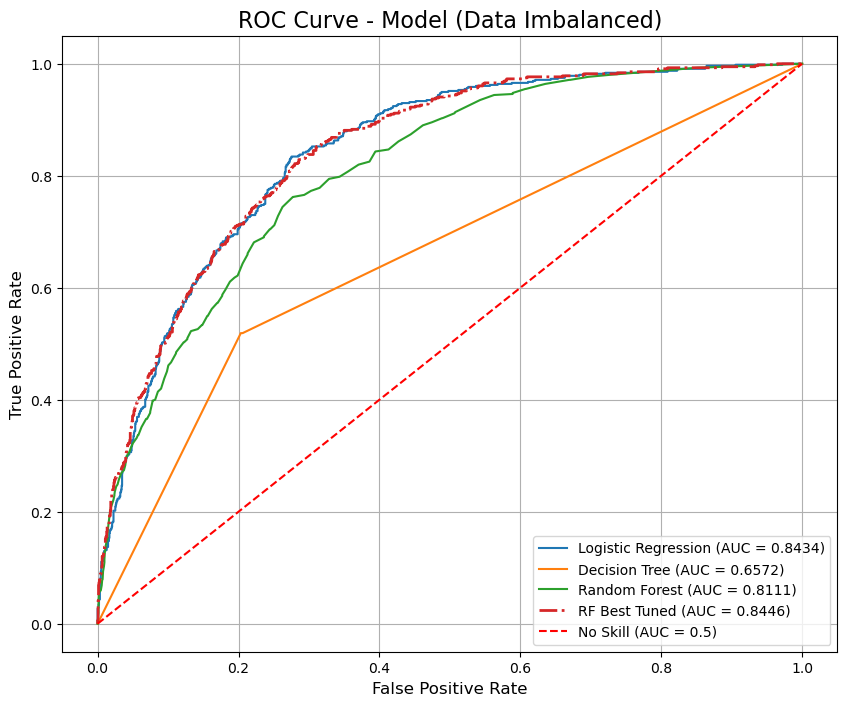

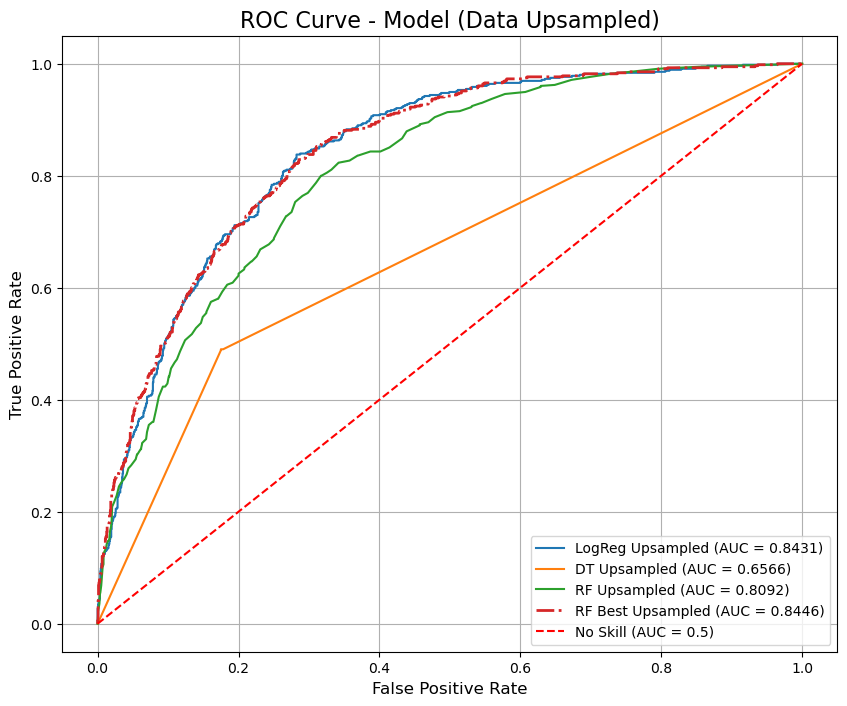

In [209]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np

# Kode ini berasumsi bahwa semua variabel dari sel [203] dan [205] 
# (y_test, y_lr, auc_lr, y_lr_up, auc_lr_up, dst.) 
# sudah ada di memori notebook Anda.

# 1. Hitung kurva FPR (False Positive Rate) dan TPR (True Positive Rate)
# Model dengan data imbalanced
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf)
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test, y_rf_best)

# Model dengan data upsampled
fpr_lr_up, tpr_lr_up, _ = roc_curve(y_test, y_lr_up)
fpr_dt_up, tpr_dt_up, _ = roc_curve(y_test, y_dt_up)
fpr_rf_up, tpr_rf_up, _ = roc_curve(y_test, y_rf_up)
fpr_rf_best_up, tpr_rf_best_up, _ = roc_curve(y_test, y_rf_best_up)


# 2. PLOT 1: Model Data Imbalanced
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.4f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot(fpr_rf_best, tpr_rf_best, label=f'RF Best Tuned (AUC = {auc_rf_best:.4f})', linestyle='-.', linewidth=2)
plt.plot([0, 1], [0, 1], 'r--', label='No Skill (AUC = 0.5)') # Garis diagonal

plt.title('ROC Curve - Model (Data Imbalanced)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)

# 3. PLOT 2: Model Data Upsampled
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr_up, tpr_lr_up, label=f'LogReg Upsampled (AUC = {auc_lr_up:.4f})')
plt.plot(fpr_dt_up, tpr_dt_up, label=f'DT Upsampled (AUC = {auc_dt_up:.4f})')
plt.plot(fpr_rf_up, tpr_rf_up, label=f'RF Upsampled (AUC = {auc_rf_up:.4f})')
plt.plot(fpr_rf_best_up, tpr_rf_best_up, label=f'RF Best Upsampled (AUC = {auc_rf_best_up:.4f})', linestyle='-.', linewidth=2)
plt.plot([0, 1], [0, 1], 'r--', label='No Skill (AUC = 0.5)') # Garis diagonal

plt.title('ROC Curve - Model (Data Upsampled)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)